In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv(r"F:\Code_Data\含高岭石矿物特征波段选取_1.csv", encoding='utf-8')  # encoding='GBK',防止中文乱码

In [3]:
data.head()

,wavelength,2100,2101,2102,2103,2104,2105,2106,2107,2108,...,2392,2393,2394,2395,2396,2397,2398,2399,2400,Label
0,10,0.307080,0.306002,0.304707,0.302903,0.300337,0.297380,0.293662,0.289946,0.285342,...,0.099929,0.099827,0.099361,0.098585,0.098930,0.099867,0.101198,0.103047,0.103668,高岭石
1,11,0.384654,0.383481,0.381992,0.380024,0.377556,0.374621,0.370973,0.367154,0.362451,...,0.144742,0.145546,0.146296,0.146433,0.147138,0.148067,0.149157,0.151143,0.152266,高岭石
2,12,0.469489,0.468427,0.467126,0.465380,0.462973,0.460029,0.456160,0.452398,0.447777,...,0.211019,0.211477,0.212224,0.213448,0.215139,0.216814,0.217501,0.218309,0.219448,高岭石
3,13,0.578407,0.577605,0.576280,0.574632,0.572484,0.569743,0.566082,0.562521,0.558116,...,0.312842,0.313856,0.315504,0.316344,0.316945,0.318528,0.319699,0.321253,0.323914,高岭石
4,14,0.643347,0.642568,0.641465,0.639807,0.637575,0.635021,0.631724,0.628554,0.624811,...,0.382586,0.384002,0.385341,0.386659,0.389139,0.390205,0.391029,0.392911,0.393515,高岭石


In [4]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [5]:
X.shape, y.shape

((90, 301), (90,))

In [6]:
X_mms = MinMaxScaler().fit_transform(X)
Label = LabelEncoder().fit_transform(y)

In [7]:
data.iloc[:,1:-1] = X_mms
data.iloc[:, -1] = Label
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

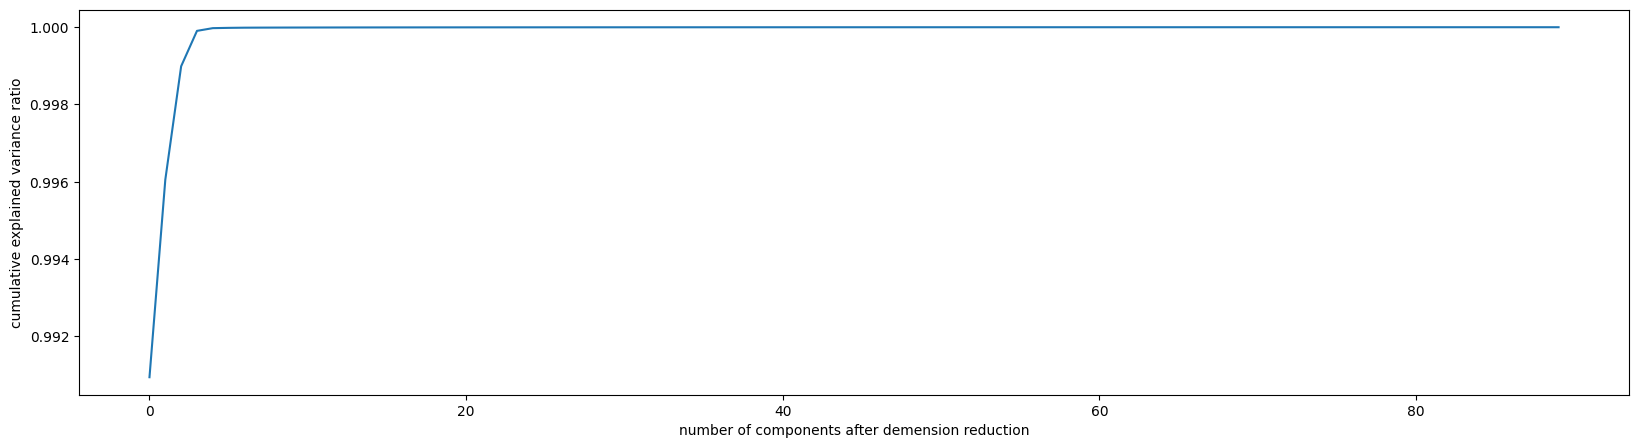

In [8]:
pca_line = PCA().fit(X) #n_components默认取值min(X.shape)=2151
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after demension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

1 1.0


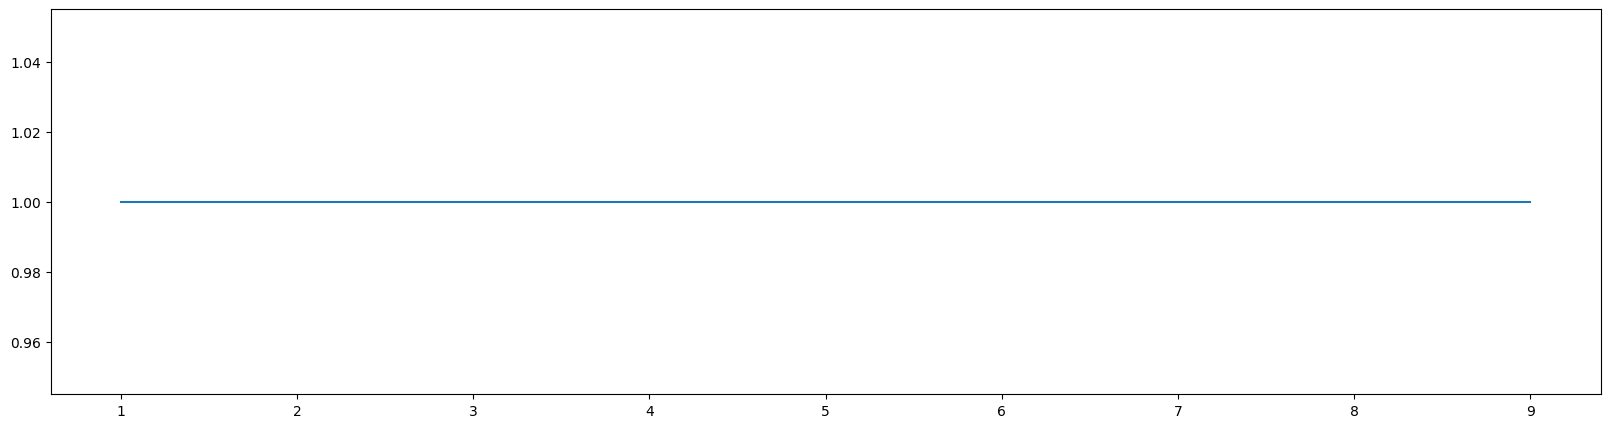

In [9]:
score = []
for i in range(1,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
print(score.index(max(score))+1, max(score))
plt.figure(figsize=[20,5])
plt.plot(range(1,10),score)
plt.show()

In [10]:
X_dr = PCA(6).fit_transform(X)

In [11]:
score_pre = cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()

In [12]:
score_pre

0.8777777777777779

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dr, y, test_size=0.4)

In [14]:
rfc = RFC(n_estimators=100,random_state=0)
rfc = rfc.fit(X_train, Y_train)
score_r = rfc.score(X_test, Y_test)
print("Random Forest:{}".format(score_r))

Random Forest:0.8333333333333334


In [15]:
rfc.predict(X_test) #predict返回每个测试样本的分类/回归结果

array([1, 1, 1, 0, 7, 1, 1, 1, 1, 5, 4, 6, 4, 4, 1, 4, 5, 6, 1, 2, 1, 1,
       4, 4, 6, 7, 4, 6, 1, 4, 6, 3, 0, 4, 6, 4])

In [16]:
rfc.score(X_train,Y_train), rfc.score(X_test,Y_test)

(1.0, 0.8333333333333334)

0.8777777777777779 61


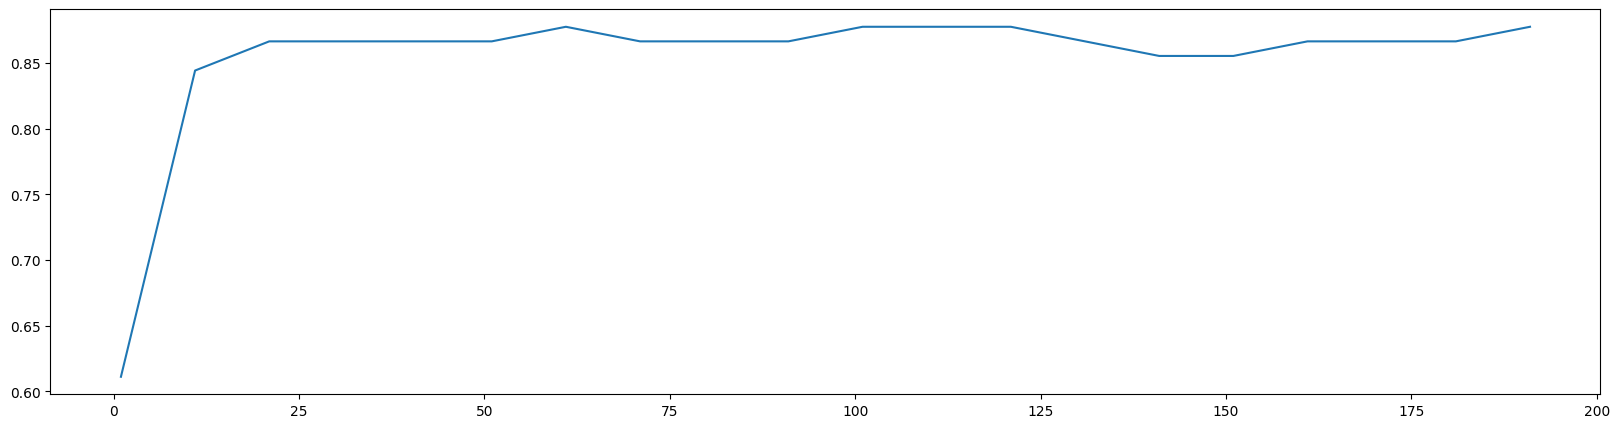

In [17]:
scorel = []
for i in range(0,200,10):
    rfc = RFC(n_estimators=i+1
              ,n_jobs=-1
              ,random_state=0)
    score = cross_val_score(rfc, X_dr, y, cv=5).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.8777777777777779 61


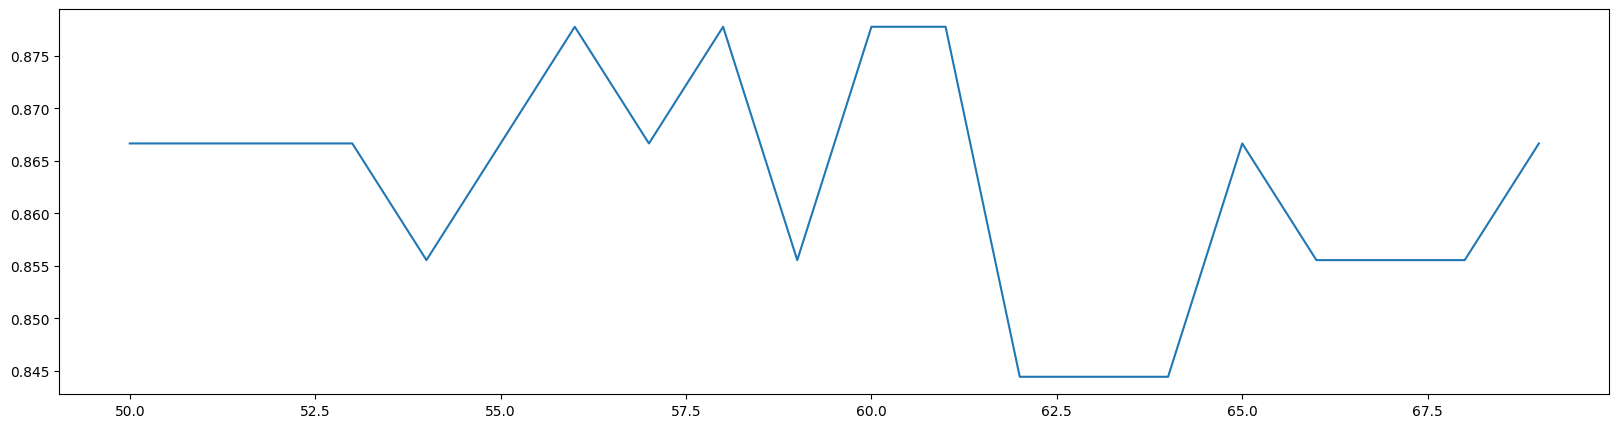

In [18]:
scorel = []
for i in range(50,70):
    rfc = RFC(n_estimators=i+1
              ,n_jobs=-1
              ,random_state=0)
    score = cross_val_score(rfc, X_dr, y, cv=5).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(50,70),scorel)
plt.show()

In [19]:
param_grid = {'max_depth':np.arange(5,20,1)}
rfc = RFC(n_estimators=61
          ,random_state=0
         )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X_dr,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=61, random_state=0),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [20]:
GS.best_params_, GS.best_score_

({'max_depth': 8}, 0.8777777777777779)

In [21]:
param_grid={'min_samples_leaf':np.arange(1, 1+50, 1)}
rfc = RFC(n_estimators=61
          ,random_state=0
         )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X_dr,y)
GS.best_params_, GS.best_score_

({'min_samples_leaf': 1}, 0.8777777777777779)

In [23]:
param_grid = {'max_features':np.arange(2,6,1)} #取最小（sqrt(n_features)）到最大特征数
rfc = RFC(n_estimators=61
          ,random_state=0
         )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X_dr,y)
GS.best_params_, GS.best_score_

({'max_features': 2}, 0.8777777777777779)

In [25]:
param_grid = {'criterion':['gini', 'entropy']}
rfc = RFC(n_estimators=61
          ,random_state=0
         )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X_dr,y)
GS.best_params_, GS.best_score_

({'criterion': 'gini'}, 0.8777777777777779)

In [26]:
rfc = RFC(n_estimators=61
          ,criterion='gini'
          ,random_state=0
         )
score = cross_val_score(rfc,X_dr,y,cv=5).mean()
score

0.8777777777777779

In [1]:
import pandas as pd

In [4]:
# 保存结果
data = {
    'Random': [0.9, 0.92, 28.54],
    'Bayes': [0.95, 0.94, 27.32]
}

index = ['Accuracy', 'Kappa', 'Optimize_time']
columns = ['Random', 'Bayes']

df = pd.DataFrame(data, index=index, columns=columns)

# 保存DataFrame为CSV文件
output_folder = 'F:/Jupyter_Notebook_file/01_Spectrum Recognition/模型评价指标'  # 替换成你要保存的文件夹路径
csv_filename = 'SG+STD_PCA_Random_Forest.txt'
df.to_csv(f'{output_folder}/{csv_filename}', sep='\t', index=True)

In [5]:
import pandas as pd
from tabulate import tabulate

# 保存结果
data = {
    'Random': [0.9, 0.92, 28.54],
    'Bayes': [0.95, 0.94, 27.32]
}

index = ['Accuracy', 'Kappa', 'Optimize_time']
df = pd.DataFrame(data, index=index)

# 将DataFrame转换为格式化的表格文本
table_txt = tabulate(df, headers='keys', tablefmt='grid')

# 保存表格文本为txt文件
output_folder = 'F:/Jupyter_Notebook_file/01_Spectrum Recognition/模型评价指标'  # 替换成你要保存的文件夹路径
txt_filename = 'SG+STD_PCA_Random_Forest.txt'
with open(f'{output_folder}/{txt_filename}', 'w') as txt_file:
    txt_file.write(table_txt)